# __*Portfolio 4*__

### __*Majd Issa : 47387602*__

#### *For this portfolio, I choose a diabetes dataset, from [this Kaggle link](https://www.kaggle.com/datasets/willianoliveiragibin/diabetesdataanslysis) containing what I believe to be really intresting information on Diabetes, and what factors could lead to the disease. The data is provided as a CSV file. Fortunately this dataset does not have any null values as it is given, however I will treat it as a completly new and unknown dataset, hence I will look for any null values, any zero values, etc...*

#### *Our main goal for this portfolio is predicting if a person has diabetes or not using Logistic Regression, KNN, and Grid Search, we will start with with a logistic regression model using all the features to predict outcome, and then use an RFE to check which one is the best. Then use different algorithms to predict the outcome (GaussianNB, Decision Tree, SVC and Random Forest), and at the end plot their testing and training scores and compare them coming up with a conclusion as which one is the best.*

The dataset contains the following columns:
- 'Pregnancies': Number of pregnancies.
- 'Glucose': Glucose level.
- 'BloodPressure': Blood pressure.
- 'SkinThickness': Skin thickness.
- 'Insulin': Insulin level.
- 'BMI': Body mass index.
- 'DiabetesPedigreeFunction': Diabetes pedigree function.
- 'Age': Age of the patient
- 'Outcome': 0 or 1, 0 representing no diabetes, and 1 representing otherwise.

In [148]:
# importing basic stuff
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.feature_selection import RFE
import warnings
import math
warnings.filterwarnings("ignore")

In [149]:
# reading the file
diabetes = pd.read_csv('data/diabetes.csv')

In [150]:
# a peak at the data
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [151]:
# shape of the data (rows, columns)
shape = diabetes.shape

# Shape will be a tuple with (number_of_rows, number_of_columns)
num_rows, num_columns = shape

print(f"The DataFrame has {num_rows} rows and {num_columns} columns.")

The DataFrame has 768 rows and 9 columns.


In [152]:
# basic look at the data description
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [153]:
# how many null values do we have?
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

*As we can see, we do not have any null values. However we might have 0 values.*

In [154]:
no_zeros = ['Glucose', 'BloodPressure','SkinThickness','BMI','Insulin', 'Age']

for column in no_zeros:
    diabetes[column] = diabetes[column].replace(0, np.NaN)
    mean = int(diabetes[column].mean(skipna=True))
    diabetes[column] = diabetes[column].replace(np.NaN, mean)

__*Instead of removing all rows where we have a value equal to 0, we will change the null 0 values into the mean of the column.*__

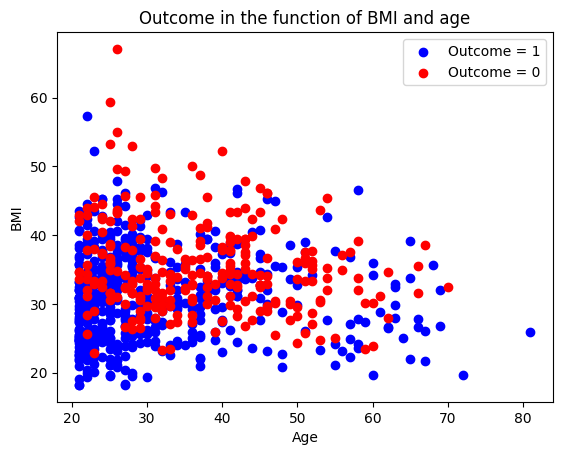

In [155]:
plt.scatter(diabetes.Age[diabetes['Outcome']==0],
            diabetes.BMI[diabetes['Outcome']==0],
            c='blue')

plt.scatter(diabetes.Age[diabetes['Outcome']==1],
            diabetes.BMI[diabetes['Outcome']==1],
            c='red')

plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Outcome in the function of BMI and age')
plt.legend(['Outcome = 1','Outcome = 0'])
plt.show()

__*We can take away a couple of things from this scatter plot. Most of people used for this study (experience) are younger than 40. Hence the results are more accurate since, as the person grows older, there's a higher chance that he has diabetes under the influence of age alone. One more takeaway from this scatter is that most people with diabetes have a BMI >= 30 which corresponds to the obese category. However most people with a healthy BMI (18.5 -> 25) do not have diabetes, and that's not a coincidence.*__

<Axes: title={'center': 'Glucose'}, xlabel='Outcome'>

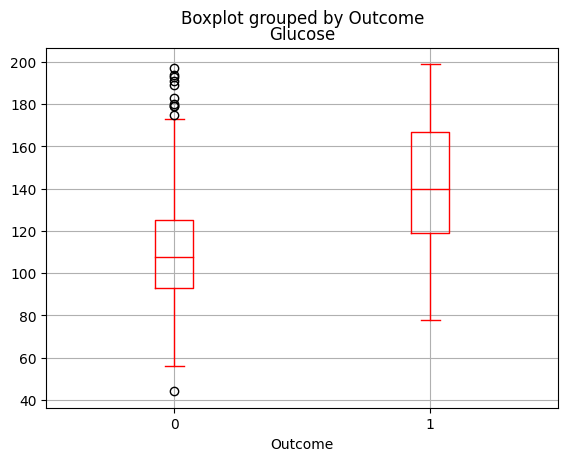

In [156]:
diabetes.boxplot(column = 'Glucose',by ='Outcome', color = 'red')

__*Unsurprisingly, we can see that people with diabetes have higher glucose mean, min and max values, however we can see that some people who do no have diabetes have really high Glucose level and this shows that even though Glucose is a really good predictor for Diabetes, it's not the only one.*__

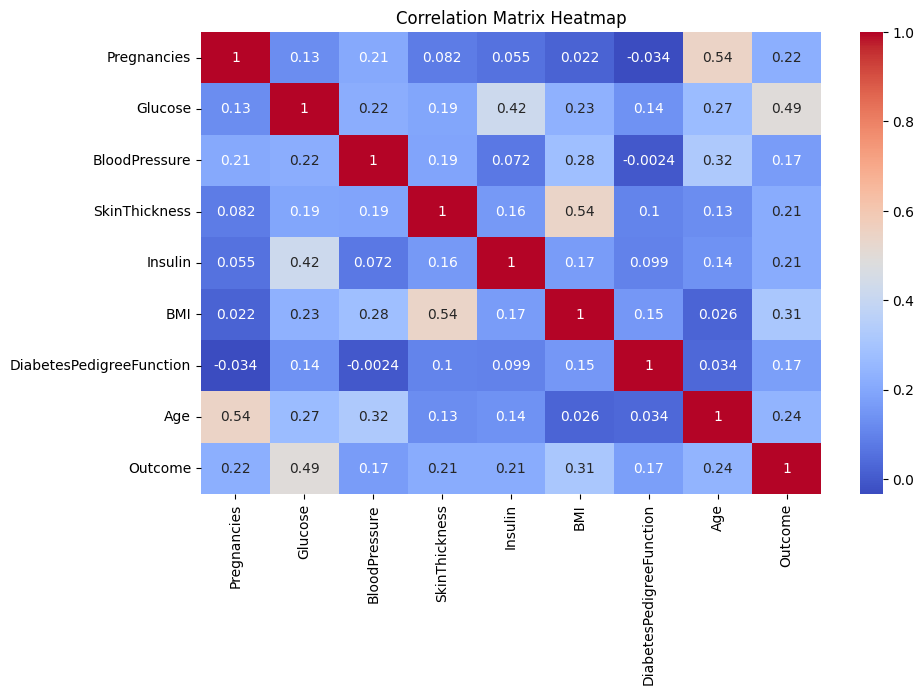

In [157]:
# find the best correlated feature for Outcome
correlation_matrix = diabetes.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

*__As we can see unsurprisingly Glucose has the higest correlation between all other features with Outcome. We will first do a logistic regression with all features, and then using RFE.__*

In [158]:
# Split your data into training(80%) and testing data (20%) and use random_state=142
train, test = train_test_split(diabetes, test_size=0.2, random_state=142)
print(train.shape)
print(test.shape)

(614, 9)
(154, 9)


In [159]:
# Getting input data and targets for building prediction model
X_train = train.drop(['Outcome'],  axis=1)
y_train = train['Outcome']
X_test = test.drop(['Outcome'], axis=1)
y_test = test['Outcome']

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)
print(X_train.head())
print(y_train.head())

X_train shape:  (614, 8)
y_train shape:  (614,)
X_test shape:  (154, 8)
y_test shape:  (154,)
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
463            5     88.0           78.0           30.0    155.0  27.6   
365            5     99.0           54.0           28.0     83.0  34.0   
474            4    114.0           64.0           29.0    155.0  28.9   
604            4    183.0           72.0           29.0    155.0  28.4   
8              2    197.0           70.0           45.0    543.0  30.5   

     DiabetesPedigreeFunction  Age  
463                     0.258   37  
365                     0.499   30  
474                     0.126   24  
604                     0.212   36  
8                       0.158   53  
463    0
365    0
474    0
604    1
8      1
Name: Outcome, dtype: int64


## __*We will store all of our models scores inside a dictionary in order to compare it at the end.*__

In [160]:
#To store results of models, we create two dictionaries
result_dict_train = {}
result_dict_test = {}

## __*Logistic Regression Model:*__

In [161]:
# Training Logistic Regression model
model = LogisticRegression()
accuracies = cross_val_score(model, X_train, y_train, cv=5)
model.fit(X_train, y_train)

LogisticRegression()

In [162]:
# Doing predictions on train and test set
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

In [163]:
predicted = model.predict(X_test)
r2_LR = r2_score(y_test, predicted)
mse_LR = mean_squared_error(y_test, predicted)
print("MSE:", mse_LR)
print("R^2:", r2_LR)

MSE: 0.14935064935064934
R^2: 0.3383149635718291


In [164]:
# Evaluate the performance of your trained model
print("Accuracy score on training set: ", accuracy_score(y_train, y_hat_train))
print("Accuracy score on testing set: ", accuracy_score(y_test, y_hat_test))

Accuracy score on training set:  0.754071661237785
Accuracy score on testing set:  0.8506493506493507


In [165]:
# Adding the values to our dictionary
result_dict_train["Logistic Train Score"] = np.mean(accuracies)
result_dict_test["Logistic Test Score"] = model.score(X_test,y_test)

*__As we can see that model performance is pretty good.Even though the R Squared is bad, the MSE implies that the error gap is small. Also, there is a big gap (.10) in the accuracy scores for training and testing set, so there is overfitting of the model.__*

In [166]:
# Checking confusion matrix
print("Confusion matrix on test set: ")
print(confusion_matrix(y_test, y_hat_test))

Confusion matrix on test set: 
[[93  8]
 [15 38]]


In [167]:
print("Confusion matrix on train set: ")
print(confusion_matrix(y_train, y_hat_train))

Confusion matrix on train set: 
[[349  50]
 [101 114]]


*__We can see that in both cases we have predicted more true postives and negatives than false negatives and positives which tells us that our model is good, but not great.__*

*__Since we have many features available, one part of building the best model will be to select which features to use as input to the classifier. Our initial model used all of the features but it is possible that a better model can be built by leaving some of them out. Hence we will use an RFE to predict what is the best single feature at first, and then see what happens if we try to select 2, 3, 4 and more features.__*

## __*Logistic Regression Model with RFE:*__

In [168]:
# creating RFE object
lr_model = LogisticRegression()
rfe = RFE(estimator=lr_model, n_features_to_select=1, step=1)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=1)

In [169]:
# doing evaluation
y_test_hat = rfe.predict(X_test)
print("accuracy score on test set: ", accuracy_score(y_test, y_test_hat))

accuracy score on test set:  0.6623376623376623


In [170]:
# summarize all features
for i in range(X_train.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 2.000
Column: 1, Selected False, Rank: 4.000
Column: 2, Selected False, Rank: 7.000
Column: 3, Selected False, Rank: 5.000
Column: 4, Selected False, Rank: 8.000
Column: 5, Selected False, Rank: 3.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected False, Rank: 6.000


__*We can clearly see that choosing 1 feature (Column 7 DiabetesPedigreeFunction in this case) only is not the way to go. But what if we use 2? Or 3? Or 4? We will use a for loop to see what's the accuracy using different number of features.*__

In [171]:
# to increment number of features, one at each time
acc_scores = []
for i in range(1,9):
    clf = LogisticRegression()
    rfe = RFE(estimator=clf, n_features_to_select=i)
    # training model
    rfe.fit(X_train, y_train)
    # predicting on test set
    y_pred = rfe.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    # print this
    print("Acc on test set using", i, "features: ", acc_score)
    # append to the list
    acc_scores.append(acc_score)

Acc on test set using 1 features:  0.6623376623376623
Acc on test set using 2 features:  0.6818181818181818
Acc on test set using 3 features:  0.7467532467532467
Acc on test set using 4 features:  0.8441558441558441
Acc on test set using 5 features:  0.8376623376623377
Acc on test set using 6 features:  0.8441558441558441
Acc on test set using 7 features:  0.8441558441558441
Acc on test set using 8 features:  0.8506493506493507


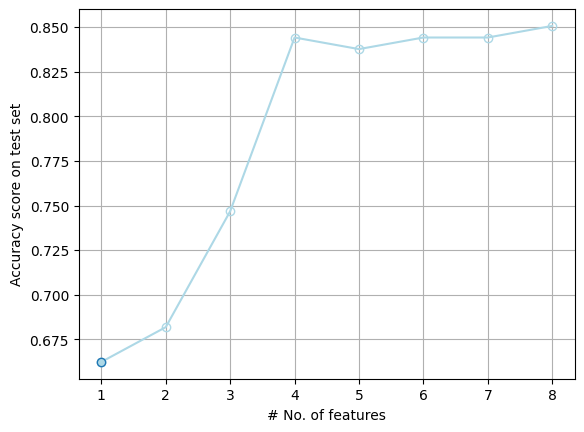

In [172]:
# Estimating accuracy score on test set using RFE by using different number of features
estimator = LogisticRegression()
acc_scores = []
for i in range(1, 9):
    selector = RFE(estimator,n_features_to_select=i)
    selector = selector.fit(X_train, y_train)
    supp = selector.get_support()

    predicted = selector.predict(X_test)
    acc_score = accuracy_score(y_test, predicted)
    acc_scores.append(acc_score)

best = 1
for item in acc_scores:
    if item < acc_scores[best - 1]:
        best = acc_scores.index(item) + 1

plt.grid()
plt.xlabel('# No. of features')
plt.ylabel('Accuracy score on test set')
plt.plot(range(1, 9), acc_scores, marker = 'o', color = 'lightblue', markeredgewidth = 1 ,markeredgecolor = 'lightblue', markerfacecolor = 'None')
plt.plot(best, acc_scores[best-1], marker = 'o', markerfacecolor = 'lightblue')
plt.show()

__*As it turned out, the best number of features is 8, which is using all of them with an accuracy of 0.8506. Hence from our initial look at the model, we can conclude that diabetes is unflenced by many factors, such as age, insulin, blood pressurem glucose... and is hardly determined by only 1 factor.*__

## __*KNN Algorithm:*__

In [173]:
# Split your data into training(80%) and testing data (20%) and use random_state=142 for KNN
train_KNN, test_KNN = train_test_split(diabetes, test_size=0.2, random_state=142)
print(train_KNN.shape)
print(test_KNN.shape)

(614, 9)
(154, 9)


In [174]:
# Getting input data and targets for building prediction model
X_train_KNN = train_KNN.drop(['Outcome'],  axis=1)
y_train_KNN = train_KNN['Outcome']
X_test_KNN = test_KNN.drop(['Outcome'], axis=1)
y_test_KNN = test_KNN['Outcome']

print("X_train shape: ", X_train_KNN.shape)
print("y_train shape: ", y_train_KNN.shape)
print("X_test shape: ", X_test_KNN.shape)
print("y_test shape: ", y_test_KNN.shape)

X_train shape:  (614, 8)
y_train shape:  (614,)
X_test shape:  (154, 8)
y_test shape:  (154,)


In [175]:
# What number of Neighbors should I do?
math.sqrt(len(diabetes))

27.712812921102035

__*By rule of thumb we should have a odd number as a number of neighbors, hence we will use 27.*__

In [224]:
# Creating a KNN model
classifier = KNeighborsClassifier(n_neighbors=27)
accuracies_KNN = cross_val_score(classifier, X_train_KNN, y_train_KNN, cv=5)
classifier.fit(X_train_KNN, y_train_KNN)

KNeighborsClassifier(n_neighbors=27)

In [225]:
# Predicting the results
y_pred_KNN = classifier.predict(X_test_KNN)
r2_KNN = r2_score(y_test_KNN, y_pred_KNN)
mse_KNN = mean_squared_error(y_test_KNN, y_pred_KNN)
print("MSE:", mse_KNN)
print("R^2:", r2_KNN)

MSE: 0.17532467532467533
R^2: 0.22323930506258194


__*Not very different from Logistic Regression, R_Squared is not that good however MSE is low which is good.*__

In [226]:
#Store results in the dictionaries
result_dict_train["KNN Train Score"] = np.mean(accuracies_KNN)
result_dict_test["KNN Test Score"] = classifier.score(X_test_KNN,y_test_KNN)

In [227]:
# Evaluate the model
con_matrix = confusion_matrix(y_test_KNN, y_pred_KNN)
print(con_matrix)

[[91 10]
 [17 36]]


In [228]:
# Evaluating f1 score and accuracy score
print("Our f1 score is:", f1_score(y_test_KNN, y_pred_KNN))
print("Our accuracy score is:", accuracy_score(y_test_KNN, y_pred_KNN))

Our f1 score is: 0.7272727272727273
Our accuracy score is: 0.8246753246753247


__*As we can see both our f1_score and our accuracy score are pretty good, however f1_score is lower but still above 0.7 which is the rule of thumb.*__

__*Up until this point we can see that Logistic Regression using all features is better than KNN using 27 neighbors.*__

## __*KNN Algorithm with tuned K:*__

__*Up until this point we chose K based on the rule of thumb, but what if we need to get the best K for the best result possible? We will tune K in this part of the portfolio to obtain the best K possible and then use it to and compare with our first model and logistic regression model.*__

In [229]:
error = []

# Calculating error for K values between 1 and 80
for i in range (1, 80):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_KNN, y_train_KNN)
    pred_i = knn.predict(X_test_KNN)
    error.append(np.mean(pred_i != y_test_KNN))

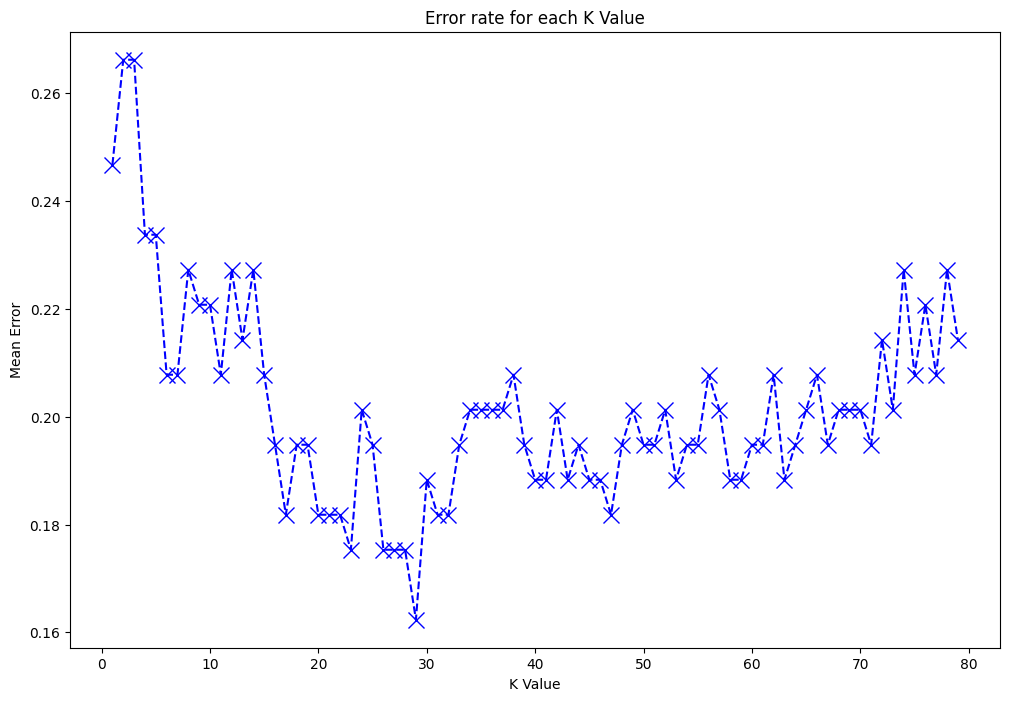

In [230]:
plt.figure(figsize=(12, 8))
plt.plot(range(1,80), error, color='blue', linestyle = 'dashed', marker = 'x', markersize = 12)
plt.title("Error rate for each K Value")
plt.xlabel("K Value")
plt.ylabel("Mean Error")
plt.show()

__*As we cann see, the K with the lowest mean error sits around 27, which is exactly what we used for our KNN model, which means that the rule of thumb of using the square root of the length of the data as K works on this dataset.*__

## __*KNN Algorithm with tuned K using RandomizedSearchCV:*__

In [311]:
# Using a grid to find the best k
k = np.random.randint(1,50,60)

params = {'n_neighbors' : k}

# CV=5 using 5 folds
random_search = RandomizedSearchCV(classifier, params, n_iter = 5, cv = 5)
random_search.fit(X_train_KNN, y_train_KNN)

print("Training score is: ", str(random_search.score(X_train_KNN, y_train_KNN)))
print("Testing score is: ", str(random_search.score(X_test_KNN, y_test_KNN)))

Training score is:  0.757328990228013
Testing score is:  0.8246753246753247


In [312]:
print(random_search.best_params_)

{'n_neighbors': 27}


__*Hence we proved using 2 methods, which are using a graph that shows the error of each K_Value, and using a RnadomizedSearchCV, that K_Value = 27 is indeed around the best value for K.*__

## __*GaussianNB Algorithm:*__

In [247]:
# Split your data into training(80%) and testing data (20%) and use random_state=142 for NB
train_NB, test_NB = train_test_split(diabetes, test_size=0.2, random_state=142)
print(train_NB.shape)
print(test_NB.shape)

(614, 9)
(154, 9)


In [248]:
# Split the data into xtrain, xtest, ytrain, ytest
X_train_NB = train_NB.drop(['Outcome'],  axis=1)
y_train_NB = train_NB['Outcome']
X_test_NB = test_NB.drop(['Outcome'], axis=1)
y_test_NB = test_NB['Outcome']

In [249]:
# Train a GaussianNB model
clf = GaussianNB()
accuracies_NB = cross_val_score(clf, X_train_NB, y_train_NB, cv=5)
clf.fit(X_train_NB, y_train_NB)

GaussianNB()

In [250]:
# Predicting the results
y_pred_NB = clf.predict(X_test_NB)
r2_NB = r2_score(y_test_NB, y_pred_NB)
mse_NB = mean_squared_error(y_test_NB, y_pred_NB)
print("MSE:", mse_NB)
print("R^2:", r2_NB)

MSE: 0.18181818181818182
R^2: 0.19447039043527015


__*We can clearly see that R_Squared is not as good as the KNN and Logistic Regression.*__

In [108]:
#Store results in the dictionaries
result_dict_train["GaussianNB Train Score"] = np.mean(accuracies_NB)
result_dict_test["GaussianNB Test Score"] = knn.score(X_test_NB,y_test_NB)

In [109]:
# Evaluating the model
y_pred_NB = clf.predict(X_test_NB)
print(classification_report(y_test_NB, y_pred_NB))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       101
           1       0.73      0.75      0.74        53

    accuracy                           0.82       154
   macro avg       0.80      0.80      0.80       154
weighted avg       0.82      0.82      0.82       154



__*We can see that our GaussianNB model is not that bad, however it is better at predicting people with no diabetes rather than people with diabetes since we can see Precision, Recall and F1_score are better where the label 0 is, than where the label 1 is.*__

## __*SVC Algorithm:*__

__*The Support Vector Algorithm is a strong tool used for classification problems, hence we will use it to predict diabetes based on the other features. You can look at the [SVC algorithm](https://www.analyticsvidhya.com/blog/2020/03/support-vector-regression-tutorial-for-machine-learning/) in more depth at the provided link above.*__

In [252]:
# Split your data into training(80%) and testing data (20%) and use random_state=142 for SVC
train_SVC, test_SVC = train_test_split(diabetes, test_size=0.2, random_state=142)
print(train_SVC.shape)
print(test_SVC.shape)

(614, 9)
(154, 9)


In [253]:
# Split the data into xtrain, xtest, ytrain, ytest
X_train_SVC = train_SVC.drop(['Outcome'],  axis=1)
y_train_SVC = train_SVC['Outcome']
X_test_SVC = test_SVC.drop(['Outcome'], axis=1)
y_test_SVC = test_SVC['Outcome']

In [254]:
svc = SVC(random_state = 42)
accuracies_SVC = cross_val_score(svc, X_train_SVC, y_train_SVC, cv=5)
svc.fit(X_train_SVC,y_train_SVC)

SVC(random_state=42)

In [257]:
# Predicting the results
y_pred_SVC = svc.predict(X_test_SVC)
r2_SVC = r2_score(y_test_SVC, y_pred_SVC)
mse_SVC = mean_squared_error(y_test_SVC, y_pred_SVC)
print("MSE:", mse_SVC)
print("R^2:", r2_SVC)

MSE: 0.2012987012987013
R^2: 0.10816364655333477


__*This model's R_Squared is not good at all, as well as MSE.*__

In [258]:
#Store results in the dictionaries
result_dict_train["SVC Train Score"] = np.mean(accuracies_SVC)
result_dict_test["SVC Test Score"] = svc.score(X_test_SVC,y_test_SVC)

In [259]:
#Obtain accuracy
print("Train Score:", np.mean(accuracies))
print("Test Score:", svc.score(X_test_SVC,y_test_SVC))

Train Score: 0.7475143276022924
Test Score: 0.7987012987012987


__*We can see that our model is not terrible, it's good but not as good as the original Logistic Regression Model, however we can look at all of these model's scores at the end of our portfolio.*__

## __*Decision Tree Algorithm:*__

__*The Decision Tree Algorithm, is also an algorithm that can be used to predict categoriacal variables like the Outcome variable we have in this dataset. You can look in more depth at [The Decision Tree Algorithm](https://www.datacamp.com/tutorial/decision-tree-classification-python) at the link provided above.*__

In [285]:
# Split your data into training(80%) and testing data (20%) and use random_state=142 for Decision Tree
train_DTC, test_DTC = train_test_split(diabetes, test_size=0.2, random_state=142)
print(train_DTC.shape)
print(test_DTC.shape)

(614, 9)
(154, 9)


In [286]:
# Split the data into xtrain, xtest, ytrain, ytest
X_train_DTC = train_DTC.drop(['Outcome'],  axis=1)
y_train_DTC = train_DTC['Outcome']
X_test_DTC = test_DTC.drop(['Outcome'], axis=1)
y_test_DTC = test_DTC['Outcome']

In [287]:
dtc = DecisionTreeClassifier(random_state = 42)
accuracies_DTC = cross_val_score(dtc, X_train_DTC, y_train_DTC, cv=5)
dtc.fit(X_train_DTC,y_train_DTC)

DecisionTreeClassifier(random_state=42)

In [288]:
# Predicting the results
y_pred_DTC = dtc.predict(X_test_DTC)
r2_DTC = r2_score(y_test_DTC, y_pred_DTC)
mse_DTC = mean_squared_error(y_test_DTC, y_pred_DTC)
print("MSE:", mse_DTC)
print("R^2:", r2_DTC)

MSE: 0.2662337662337662
R^2: -0.17952549971978304


__*R_Squared is negative, which means that the line or curve does an awful job of fitting the data, and MSE is bigger than usual.*__

In [125]:
#Store results in the dictionaries
result_dict_train["Decision Tree Train Score"] = np.mean(accuracies_DTC)
result_dict_test["Decision Tree Test Score"] = dtc.score(X_test_DTC,y_test_DTC)

In [126]:
#Obtain accuracy
print("Train Score:",np.mean(accuracies_DTC))
print("Test Score:",dtc.score(X_test_DTC,y_test_DTC))

Train Score: 0.66609356257497
Test Score: 0.7337662337662337


__*This model does not appear to be a strong model, however we will see how it compares to other models at the end.*__

## __*Random Forest Algorithm:*__

__*Just as all of our models, this model can be used for classification problems, hence we will use it here and compare it to other models. You can learn more about [The Random Forest Algorithm](https://www.datacamp.com/tutorial/random-forests-classifier-python) at the link provided above.*__

In [271]:
# Split your data into training(80%) and testing data (20%) and use random_state=142 for Decision Tree
train_RF, test_RF = train_test_split(diabetes, test_size=0.2, random_state=142)
print(train_RF.shape)
print(test_RF.shape)

(614, 9)
(154, 9)


In [272]:
# Split the data into xtrain, xtest, ytrain, ytest
X_train_RF = train_RF.drop(['Outcome'],  axis=1)
y_train_RF = train_RF['Outcome']
X_test_RF = test_RF.drop(['Outcome'], axis=1)
y_test_RF = test_RF['Outcome']

In [273]:
rfc = RandomForestClassifier(random_state = 42)
accuracies_RF = cross_val_score(rfc, X_train_RF, y_train_RF, cv=5)
rfc.fit(X_train_RF,y_train_RF)

RandomForestClassifier(random_state=42)

In [276]:
# Predicting the results
y_pred_RF = rfc.predict(X_test_RF)
r2_RF = r2_score(y_test_RF, y_pred_RF)
mse_RF = mean_squared_error(y_test_RF, y_pred_RF)
print("MSE:", mse_RF)
print("R^2:", r2_RF)

MSE: 0.16883116883116883
R^2: 0.25200821968989373


__*This model's results are pretty solid, on the same level of the Logisitic Regression model.*__

In [275]:
#Store results in the dictionaries
result_dict_train["Random Forest Train Score"] = np.mean(accuracies_RF)
result_dict_test["Random Forest Test Score"] = rfc.score(X_test_RF,y_test_RF)

In [134]:
#Obtain accuracy
print("Train Score:",np.mean(accuracies_RF))
print("Test Score:",rfc.score(X_test_RF,y_test_RF))

Train Score: 0.7410235905637744
Test Score: 0.8311688311688312


__*This model does not look bad at all, in fact it looks like one of the best models.*__

## __*Comparison and concolusion:*__

In [135]:
# We will create 2 data frames, one for the training test values, and one for the testing values.
df_result_train = pd.DataFrame.from_dict(result_dict_train,orient = "index", columns=["Score"])
df_result_train

,Score
Logistic Train Score,0.747514
KNN Train Score,0.721471
GaussianNB Train Score,0.732840
SVC Train Score,0.736186
Decision Tree Train Score,0.666094
Random Forest Train Score,0.741024


In [136]:
df_result_test = pd.DataFrame.from_dict(result_dict_test,orient = "index",columns=["Score"])
df_result_test

,Score
Logistic Test Score,0.850649
KNN Test Score,0.824675
GaussianNB Test Score,0.785714
SVC Test Score,0.798701
Decision Tree Test Score,0.733766
Random Forest Test Score,0.831169


<Axes: ylabel='Score'>

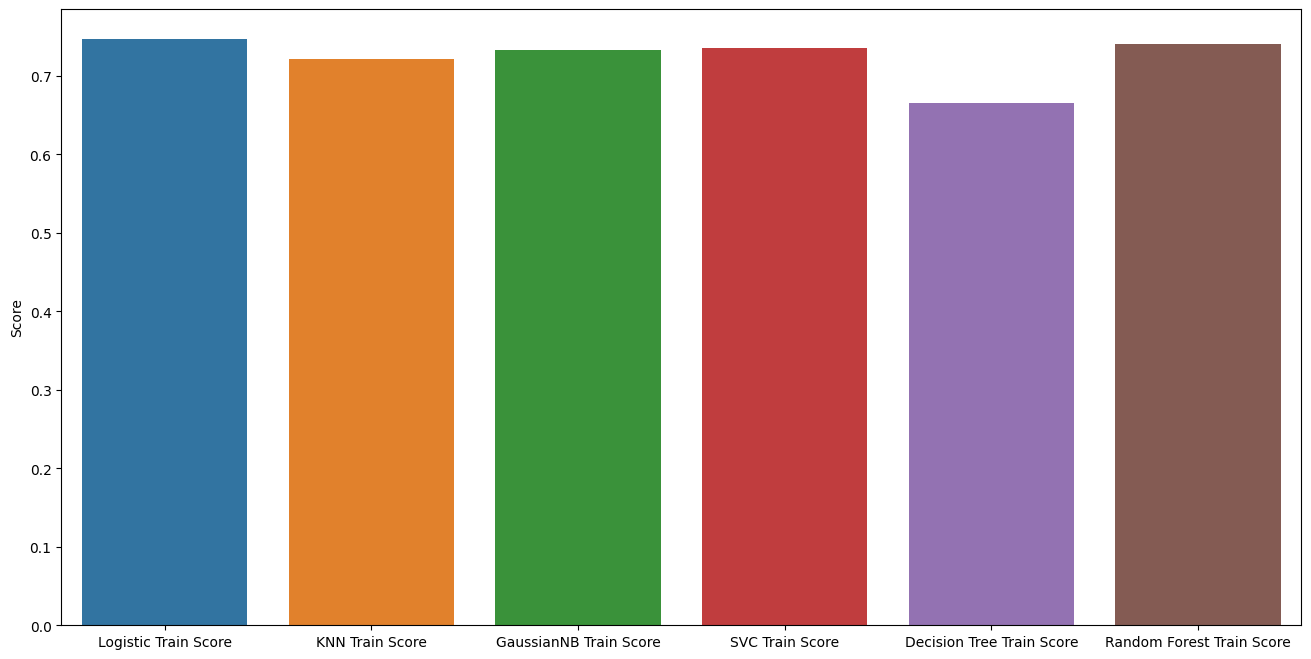

In [155]:
fig = plt.figure(figsize=(16,8))
sns.barplot(x = df_result_train.index,y = df_result_train.Score)

__*As we can see, Logistic regression and Random Forest algorithms have the best training score, of around 0.75, followed by SVC, GaussianNB, and KNN algorithms, and the worst is the Decision Tree score at 0.66 which is bad compared to all of the other algorithms.*__

<Axes: ylabel='Score'>

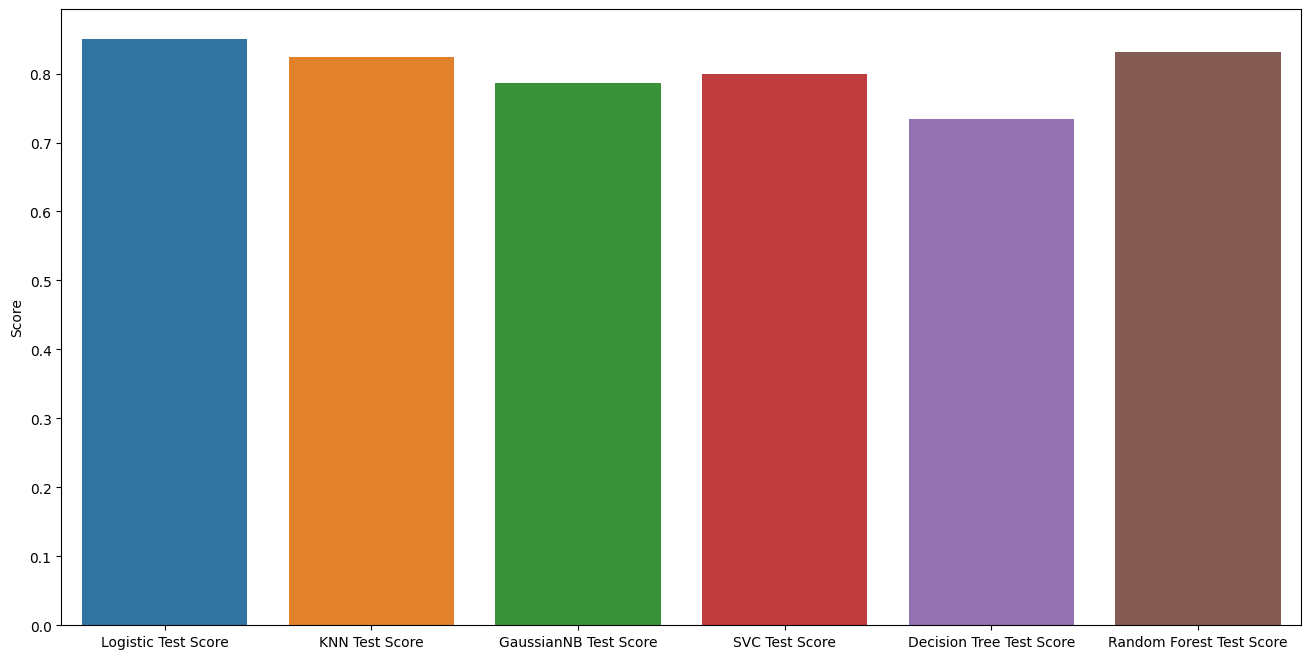

In [156]:
fig = plt.figure(figsize=(16,8))
sns.barplot(x = df_result_test.index,y = df_result_test.Score)

__*Unsurprisingly, Logisitc has the best Testing score (0.85), followed by Random Forest model (0.83) and then KNN (0.82), and again the Decision Tree test score is the worst.*__

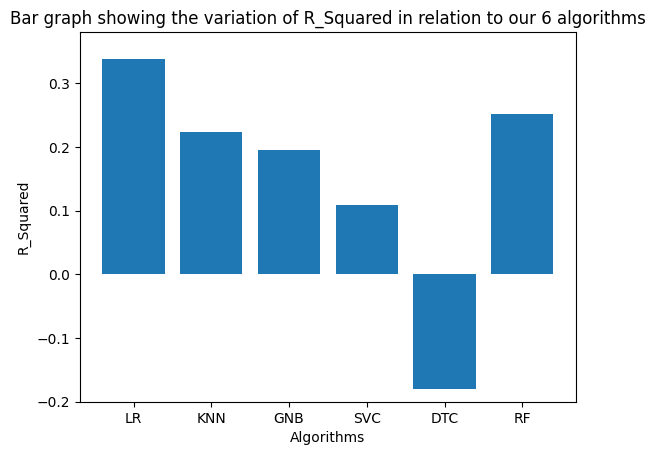

In [295]:
# Plotting R_Squared
cases = ["LR", "KNN", "GNB", "SVC","DTC", "RF"]
mse_values = [r2_LR, r2_KNN, r2_NB, r2_SVC, r2_DTC, r2_RF]

fig, ax = plt.subplots()
# plotting MSE values against their models
ax.bar(cases, mse_values)
plt.xlabel("Algorithms")
plt.ylabel("R_Squared")
plt.title("Bar graph showing the variation of R_Squared in relation to our 6 algorithms")
plt.ylim(-0.2,0.38)
plt.show()

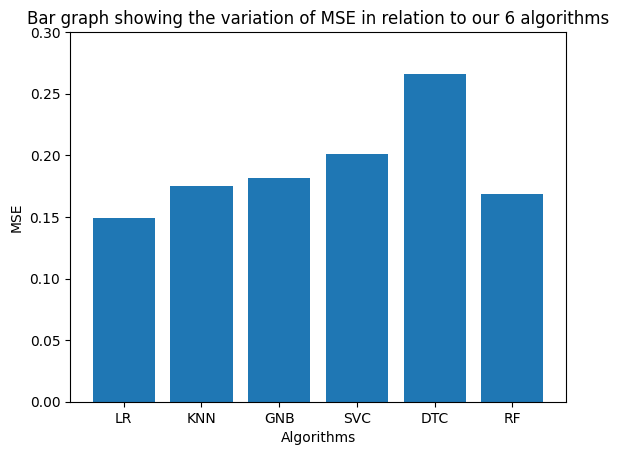

In [296]:
# Plotting MSE
cases = ["LR", "KNN", "GNB", "SVC","DTC", "RF"]
mse_values = [mse_LR, mse_KNN, mse_NB, mse_SVC, mse_DTC, mse_RF]

fig, ax = plt.subplots()
# plotting MSE values against their models
ax.bar(cases, mse_values)
plt.xlabel("Algorithms")
plt.ylabel("MSE")
plt.title("Bar graph showing the variation of MSE in relation to our 6 algorithms")
plt.ylim(0,0.30)
plt.show()

__*Just as the testing and training scores, we have Logistic Regressio being the best, Random Forest being the second best, then KNN, GaussianNB, Support Vector, then Decision Tree being the worst in both R_Squared and MSE, since the best algorithm has the highest R_Squared and the lowest Mean Squared Error, and the worst having the lowest R_Squared and the highest MSE.*__

__*To conclude this portfolio, we can say that Logistic Regression is the best model to use for this specific dataset, having the highest testing scores, f1_scores and accuracy scores, R_Sqaured and lowest MSE, followed by the Random Forest Algorithm, then SVC and KNN are almost tied for third place, leaving Gaussian at the 4th best and the Decision Tree Algorithm as the worst algorithm with the lowest scores overall.*__